<a href="https://colab.research.google.com/github/amrendra1002/DS-ML/blob/master/DL_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow==2.4.0
!pip install keras==2.4.3

     |████████████████████████████████| 394.7 MB 16 kB/s 
     |████████████████████████████████| 2.9 MB 53.0 MB/s 
     |████████████████████████████████| 462 kB 81.8 MB/s 
     |████████████████████████████████| 3.8 MB 47.2 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.

  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import time
import random
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
#from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.models import load_model
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
os.chdir(r'/content/drive/MyDrive/Copy of Image_captioning_Dataset.zip (Unzipped Files)')
infile = open('set_4.pkl','rb')
inputData = pickle.load(infile)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

cat-2083492__480.jpg			model-ep003-loss4.108-val_loss4.160.h5
descriptions.txt			model-ep003-loss5.469-val_loss5.658.h5
description.txt				model-ep004-loss3.318-val_loss3.691.h5
features.pkl				model-ep004-loss4.012-val_loss4.155.h5
Flicker8k_Dataset			model-ep004-loss4.700-val_loss5.270.h5
model-ep001-loss4.320-val_loss3.876.h5	model-ep005-loss4.102-val_loss4.978.h5
model-ep001-loss5.136-val_loss4.352.h5	model-ep006-loss3.661-val_loss4.908.h5
model-ep001-loss5.212-val_loss4.644.h5	model-ep007-loss3.379-val_loss4.854.h5
model-ep001-loss8.285-val_loss6.852.h5	model-ep008-loss3.184-val_loss4.845.h5
model-ep001-loss8.300-val_loss6.847.h5	model-ep010-loss2.936-val_loss4.827.h5
model-ep002-loss3.680-val_loss3.729.h5	model.png
model-ep002-loss4.283-val_loss4.202.h5	pic1.jpg
model-ep002-loss4.357-val_loss4.264.h5	set_4.pkl
model-ep002-loss6.387-val_loss6.191.h5	Style.jpg
model-ep002-loss6.473-val_loss6.148.h5	testImages.txt
model-ep003-loss3.453-val_loss3.694.h5	trainImages.txt
model-ep003-lo

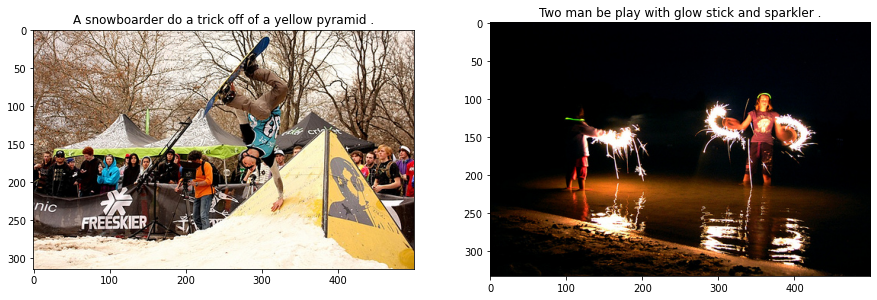

In [4]:
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))
for i in range(2):
    img = load_img("Flicker8k_Dataset" + "/" + inputData[i].split("#")[0])
    ax[i].imshow(img)
    ax[i].set_title(inputData[i].split("\t")[1])

In [8]:

from os import listdir

# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = ResNet50()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		#print('>%s' % name)
	return features

# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

NameError: ignored

In [9]:
from pickle import dump
# save to file
dump(features, open('features.pkl', 'wb'))

In [60]:
!ls

descriptions.txt			model-ep003-loss3.453-val_loss3.694.h5
description.txt				model-ep003-loss3.819-val_loss4.159.h5
features.pkl				model-ep004-loss3.318-val_loss3.691.h5
Flicker8k_Dataset			model.png
model-ep001-loss4.320-val_loss3.876.h5	set_4.pkl
model-ep001-loss5.212-val_loss4.644.h5	testImages.txt
model-ep002-loss3.680-val_loss3.729.h5	trainImages.txt
model-ep002-loss4.357-val_loss4.264.h5


In [5]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
  #os.chdir(r'/content/drive/MyDrive/Copy of Image_captioning_Dataset.zip (Unzipped Files)')
  lines = list()
  for item in descriptions:
    key = item.split("\t")[0].split(".")[0]
    try:
   # print(key)
      desc = item.split("\t")[1]
    except:
      continue
    lines.append(key + ' ' + desc)
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()

save_descriptions(inputData,"description.txt")

In [16]:
 def split_img_train_test():
   lines = list()
   all_features = load(open('features.pkl', 'rb'))
   for key in all_features:

     lines.append(key)

   random.shuffle(lines)
   size = len(lines)
   #split into train and test(80:20)
   print(size, int(size*0.8),int(size*0.8) ) 
   print(len(lines[0:int(size*0.8)]))
   print(len(lines[int(size*0.8):]))
   #trainImages = '\n'.join(lines[0:int(size*0.8)])
   #testImages = '\n'.join(lines[int(size*0.8):])
   trainImages = '\n'.join(lines[0:200])
   testImages = '\n'.join(lines[200:300])
   file = open('trainImages.txt', 'w')
   file.write(trainImages)
   file.close()
   file = open('testImages.txt', 'w')
   file.write(testImages)
   file.close()
   
split_img_train_test()

8091 6472 6472
6472
1619


In [46]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM, RNN
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line
		dataset.append(identifier)
	return set(dataset)
 
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions
 
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features
 
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc
 
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None  
 
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	print("success")
	return max(len(d.split()) for d in lines)
 
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)
 
# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01))(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	print(model.summary())
	plot_model(model, to_file='model.png', show_shapes=True)
	return model
 
# train dataset
 
# load training dataset (6K)
filename = 'trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('description.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)
 
# dev dataset
 
# load test set
filename = 'testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('description.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features, vocab_size)
 
# fit model
 
# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
start = time.time()
model.fit([X1train, X2train], ytrain, epochs=5, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))
end = time.time()

print("\n" + f"Training time: {end - start}s")

Dataset: 200
Descriptions: train=199
Photos: train=200
Vocabulary Size: 869
success
Description Length: 29
Dataset: 100
Descriptions: test=99
Photos: test=100
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 29)]         0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 29, 256)      222464      input_14[0][0]                   
__________________________________________________________________________________________________
dropout_12 (Dropout)            

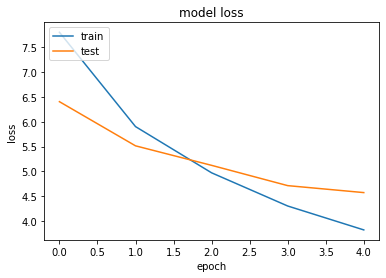

In [47]:
def plot_accuracy_loss(model):
  history = model.history
  # summarize history for loss
  pyplot.plot(history.history['loss'])
  pyplot.plot(history.history['val_loss'])
  pyplot.title('model loss')
  pyplot.ylabel('loss')
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.show()

plot_accuracy_loss(model)

In [48]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)
 
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions
 
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features
 
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc
 
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
 
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)
 
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None
 
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text
 
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
 
# prepare tokenizer on train set
 
# load training dataset (6K)
filename = 'trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('description.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
 
# prepare test set
 
# load test set
filename = 'testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('description.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
 
# load the model
filename = 'model-ep005-loss3.826-val_loss4.576.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 200
Descriptions: train=199
Vocabulary Size: 869
Description Length: 29
Dataset: 100
Descriptions: test=99
Photos: test=100
BLEU-1: 0.271848
BLEU-2: 0.083581
BLEU-3: 0.038749
BLEU-4: 0.062948


In [49]:
def extract_image_features(file):
	# load the model
	model = ResNet50()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# summarize
	#print(model.summary())
	# extract features from each photo
	features = dict()
	image = load_img(file, target_size=(224, 224))
	#convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	#get image id
	#image_id = name.split('.')[0]
	# store feature
	#features[image_id] = feature
	return feature

In [50]:
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

In [63]:
from google.colab import files
uploaded = files.upload()

Saving pic1.jpg to pic1.jpg


In [51]:
from os import listdir

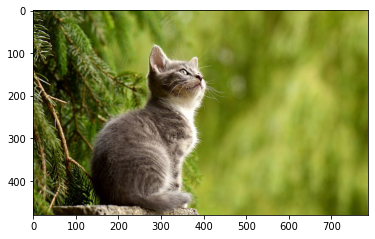

In [52]:
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6,6))
img = load_img('/content/drive/My Drive/Copy of Image_captioning_Dataset.zip (Unzipped Files)/cat-2083492__480.jpg')
ax.imshow(img)

In [54]:
image_feature = extract_image_features('/content/drive/My Drive/Copy of Image_captioning_Dataset.zip (Unzipped Files)/pic1.jpg')

102973440/102967424 [==============================] - 1s 0us/step


In [16]:
best_model = load_model('model-ep004-loss3.318-val_loss3.691.h5')

In [56]:
generate_desc(model, tokenizer, image_feature, 29)

'startseq a in endseq'

In [19]:
!ls

cat-2083492__480.jpg			model-ep003-loss4.108-val_loss4.160.h5
descriptions.txt			model-ep003-loss5.469-val_loss5.658.h5
description.txt				model-ep004-loss3.318-val_loss3.691.h5
features.pkl				model-ep004-loss4.012-val_loss4.155.h5
Flicker8k_Dataset			model-ep004-loss4.700-val_loss5.270.h5
model-ep001-loss4.320-val_loss3.876.h5	model-ep005-loss4.102-val_loss4.978.h5
model-ep001-loss5.136-val_loss4.352.h5	model-ep006-loss3.661-val_loss4.908.h5
model-ep001-loss5.212-val_loss4.644.h5	model-ep007-loss3.379-val_loss4.854.h5
model-ep001-loss8.285-val_loss6.852.h5	model-ep008-loss3.184-val_loss4.845.h5
model-ep001-loss8.300-val_loss6.847.h5	model-ep010-loss2.936-val_loss4.827.h5
model-ep002-loss3.680-val_loss3.729.h5	model.png
model-ep002-loss4.283-val_loss4.202.h5	pic1.jpg
model-ep002-loss4.357-val_loss4.264.h5	set_4.pkl
model-ep002-loss6.387-val_loss6.191.h5	Style.jpg
model-ep002-loss6.473-val_loss6.148.h5	testImages.txt
model-ep003-loss3.453-val_loss3.694.h5	trainImages.txt
model-ep003-lo

# Choosing the layers, neurons, and optimisers:
Number of layers and nuerons in each layer are hyperparameters and the optimal value can be identified only throught experimentation. We tried different  options and set the below which gave the optimal accuracy. 512 neurons in the first layer is a good choice as out input size is 784.

We selected Adam as an optimiser. Adam performs a form of learning rate annealing with adaptive step-sizes. With the default value of base learning rate the model accuracy was flactuating so tried reducing the base learning rate and the value of 0.00001 was found optimal.

# Models comparision
 

1.   model 1 accuracy on test data with **batch size 32** and **dropout of 0.2** at layer 1 is **0.9442538593481989**
2.   model 2 accuracy on test data with **batch size 64** and **dropout of 0.2** at layer 1  is **0.9391080617495712**
3. model 3 accuracy on test data with **batch size 32** and **dropout of 0.4** at layer 2  is **0.9425385934819898**



*   Model1 performace is slighly better than model2 because of the lower batch size. Smaller batch size tends to generalization better hence better accuray on test data.
*   Model3 performance is poor as compared to model1 with same batch size but different dropout value and position. This may be because of higher magniture of dropout tends to increase bias and hence lower accuracy on both train and test data






By analysing the classification report of each of the three models, we identify the first model as best performing one. Above is the classification report of that model. As per the precision, recall and f1-score we can say that the model classify PNEUMONIA class better than NORMAL class. 